In [ ]:
import cv2
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np

In [ ]:
#Taking image2
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# Taking image3
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# Taking image4

def take_photo(filename='.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

# Taking image5
x = 0
for x in range(3):
  try:
     filename = take_photo('N' + str(x) + 'photo.jpg')
     print('Saved to {}'.format(filename))
      
     # Show the image which was just taken.
     display(Image(filename))
 
  except Exception as err:
     print(str(err)) 
  

<IPython.core.display.Javascript object>

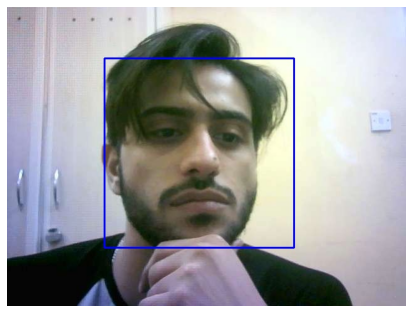

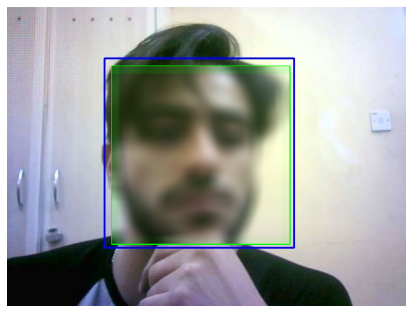

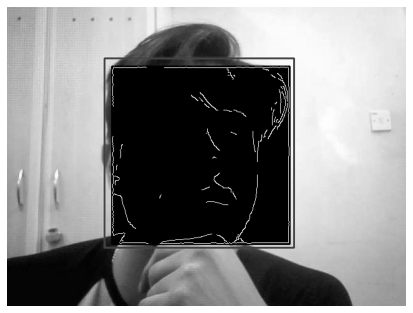

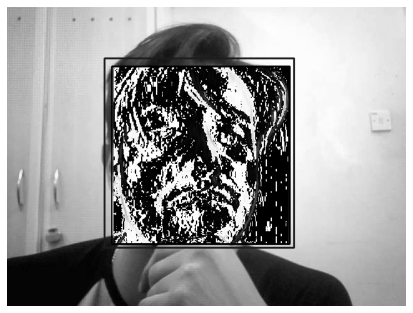

In [ ]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2 as cv


# A function for plotting the images
  
  
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()
  
  
# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image3 = cv2.imread('N0photo.jpg')
image4 = cv2.imread('N0photo.jpg')
image5 = cv2.imread('N0photo.jpg')

  
# Converting BGR image into a RGB image
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image5 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
  
# plotting the original image
plotImages(image3)

face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data  = face_detect.detectMultiScale(image3, 1.3, 5)
face_data1 = face_detect.detectMultiScale(image4, 1.3, 5)
face_data2 = face_detect.detectMultiScale(image4, 1.3, 5)


# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:

    cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image3[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)

    # impose this blurred image on original image to get final image
    image3[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


image4_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
for (x, y, w, h) in face_data1:
    
    cv2.rectangle(image4_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi1 = image4_gray[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area

    roi1 = cv2.Canny(roi1,200,400)

    # impose this blurred image on original image to get final image
    image4_gray[y:y+roi1.shape[0], x:x+roi1.shape[1]] = roi1


image5_gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
for (x, y, w, h) in face_data2:

    cv2.rectangle(image5_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi2 = image5_gray[y:y+h, x:x+w]
  
    # Convert to graycsale
    # roi2_gray = cv2.cvtColor(roi2, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    roi2_blur = cv2.GaussianBlur(roi2, (1,1), 0) 
    roi2 = cv2.Sobel(src=roi2_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Combined X and Y Sobel Edge Detection




    # impose this blurred image on original image to get final image
    image5_gray[y:y+roi2.shape[0], x:x+roi2.shape[1]] = roi2

figure, axis =plt.subplot(1,4)


# Display the output
plotImages(image3)
plotImages(image4_gray)
plotImages(image5_gray)
